In [1]:
%pip install chromospyce -q
%pip install pyBigWig -q
%pip install bioframe -q
import pyBigWig
import chromospyce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bioframe as bf

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


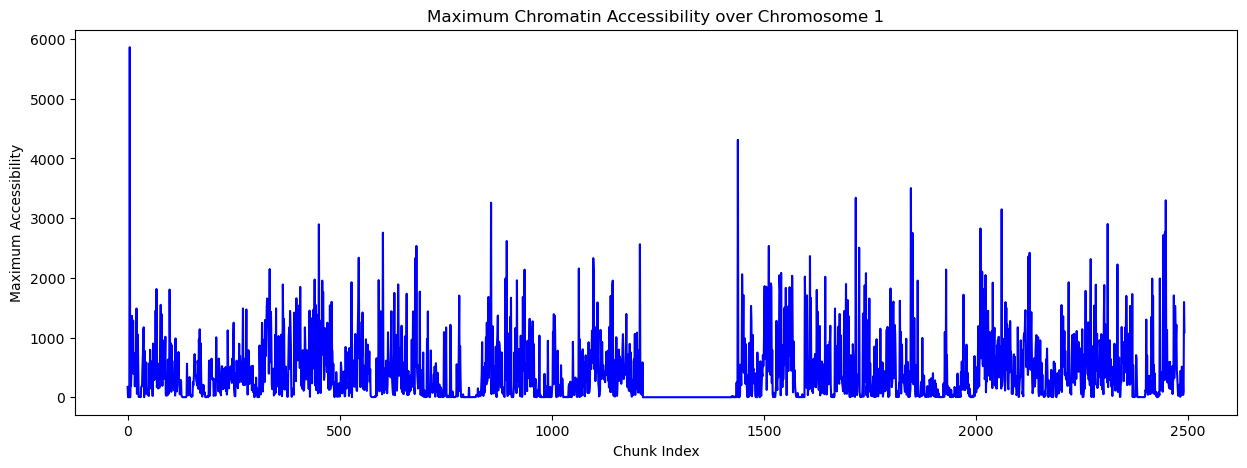

Widget(structure=b'\xff\xff\xff\xff\x80\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\…

In [2]:
# Open the ATAC-seq data for chromatin accessibility
bw_atac = pyBigWig.open("atac-seq/ATAC1.bw")

# Select a chromosome (e.g., 'chr1') to extract ATAC-seq data
chrom = "chr1"
start = 0
end = bw_atac.chroms(chrom)

# Extract ATAC-seq values for the full length of chromosome 1
values_atac = bw_atac.values(chrom, start, end, numpy=True)

# Close the ATAC-seq data file
bw_atac.close()

# Process values in chunks to calculate maximum accessibility
chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max_atac.append(np.nanmax(chunk))

# Convert to an array
max_atac_array = np.array(max_atac)

# Plot the maximum accessibility values for chromosome 1
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Chromosome 1')
plt.show()

# Read 3D chromatin data
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

# Filter for coordinates of all chromosomes
all_chromosomes_coords = []
for chrom in data['chr'].unique():
    chrom_data = data[data['chr'] == chrom]
    chrom_coords = chrom_data[["x", "y", "z"]].to_numpy()
    all_chromosomes_coords.append(chrom_coords)

# Flatten the list of all coordinates
all_chromosomes_coords = np.concatenate(all_chromosomes_coords)

# Initialize color values with zeros for all coordinates
color_values_all = np.zeros(len(all_chromosomes_coords))

# Get the indices for chromosome 1's coordinates
chrom1_coords = data[data['chr'] == '1(pat)']
chrom1_coords_len = len(chrom1_coords)

# Trim max_atac_array to match the size of chrom1_coords
max_atac_array_trimmed = max_atac_array[:chrom1_coords_len]

# Assign max ATAC-seq accessibility values to chromosome 1 coordinates
color_values_all[:chrom1_coords_len] = max_atac_array_trimmed

# Color configuration
vc = {
    "color": {
        "values": color_values_all.tolist(),
        "min": np.min(color_values_all),
        "max": np.max(color_values_all),
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

# Visualize the chromosome structure with ATAC-seq accessibility values
chromospyce.Widget(all_chromosomes_coords, vc)


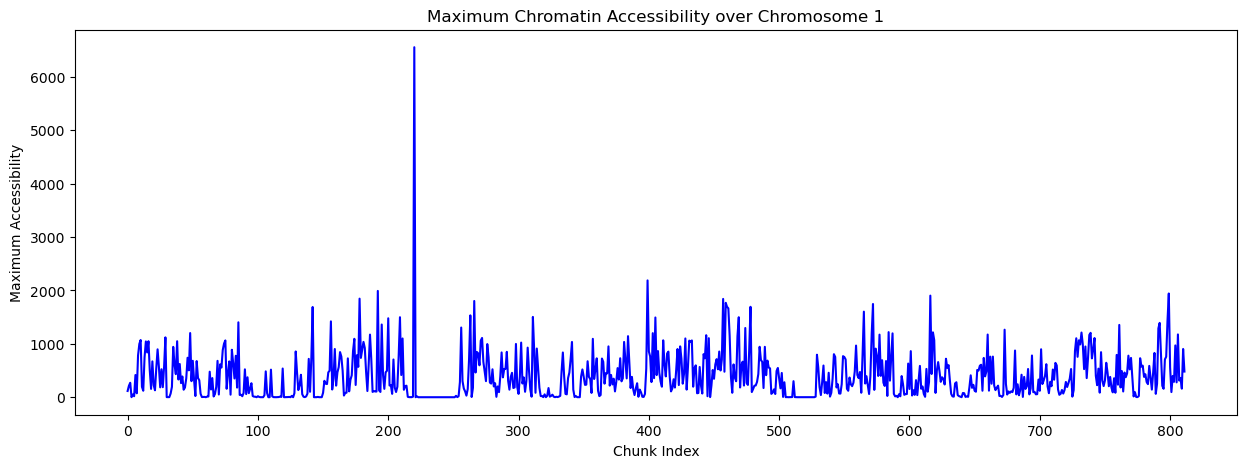

0.01
1.0


Widget(structure=b'\xff\xff\xff\xff\x80\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\…

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig
import bioframe as bf
import chromospyce

# Open the ATAC-seq data for chromatin accessibility
bw_atac = pyBigWig.open("atac-seq/ATAC1.bw")

# Select a chromosome (e.g., 'chr1') to extract ATAC-seq data
chrom = "chr17"
start = 0
end = bw_atac.chroms(chrom)

# Extract ATA7-seq values for the full length of chromosome 1
values_atac = bw_atac.values(chrom, start, end, numpy=True)

# Close the ATAC-seq data file
bw_atac.close()

# Process values in chunks to calculate maximum accessibility
chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max_atac.append(np.nanmax(chunk))

# Convert to an array
max_atac_array = np.array(max_atac)

# Plot the maximum accessibility values for chromosome 1
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Chromosome 1')
plt.show()

# Read 3D chromatin data
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

# Ensure the data has the required columns for bioframe
data['chrom'] = data['chr']  # Rename 'chr' to 'chrom'
data['start'] = 0  # Placeholder for start position
data['end'] = end  # Placeholder for end position (modify as needed for real data)

# Filter for coordinates of all chromosomes
all_chromosomes_coords = []
for chrom in data['chrom'].unique():
    chrom_data = data[data['chrom'] == chrom]
    chrom_coords = chrom_data[["x", "y", "z"]].to_numpy()
    all_chromosomes_coords.append(chrom_coords)

# Flatten the list of all coordinates
all_chromosomes_coords = np.concatenate(all_chromosomes_coords)

# Initialize color values with zeros for all coordinates
color_values_all = np.zeros(len(all_chromosomes_coords))

# Get the indices for chromosome 1's coordinates
chrom1_coords = data[data['chrom'] == '17(pat)']
chrom1_coords_len = len(chrom1_coords)

# Trim max_atac_array to match the size of chrom1_coords
max_atac_array_trimmed = max_atac_array[:chrom1_coords_len]

# Assign max ATAC-seq accessibility values to chromosome 1 coordinates
color_values_all[:chrom1_coords_len] = max_atac_array_trimmed

# Define default opacity for all regions (translucent by default)
opacity_values = np.ones(len(data)) * 0.01

# Use bioframe to query regions of interest (e.g., chromosome 1)
region_of_interest = bf.select(data, region=('1(pat)', 0, chrom1_coords_len), cols=("chrom", "start", "end"))

# Make the queried region opaque
region_indices = data.index.isin(region_of_interest.index)
opacity_values[region_indices] = 1.0  # Fully opaque for the region of interest
print(np.min(opacity_values))
print(np.max(opacity_values))

# color configuration for chromospyce visualization
vc = {
    "color": {
        "values": color_values_all.tolist(),
        "min": np.min(color_values_all),
        "max": np.max(color_values_all),
        "colorScale": "YlOrRd"  # Red to yellow to purple (extreme values)
    },
    "opacity": {
        "values": opacity_values.tolist(),
        "min": np.min(opacity_values),
        "max": np.max(opacity_values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

# Visualize the chromosome structure with ATAC-seq accessibility and opacity
chromospyce.Widget(all_chromosomes_coords, vc)


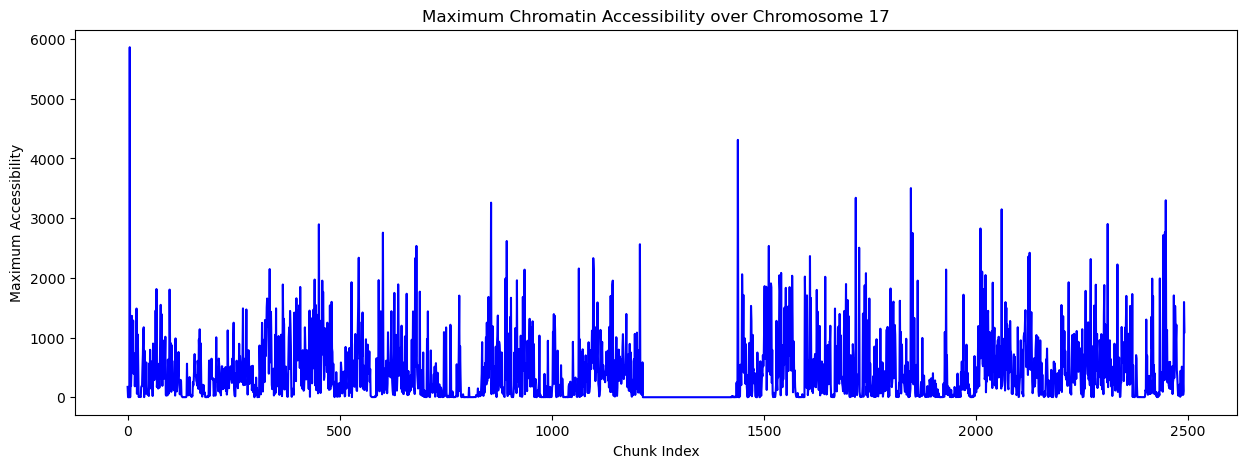

Widget(structure=b'\xff\xff\xff\xff\x80\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\…

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig
import bioframe as bf
import chromospyce

# Open the ATAC-seq data for chromatin accessibility
bw_atac = pyBigWig.open("atac-seq/ATAC1.bw")

# Select a chromosome (e.g., 'chr17') to extract ATAC-seq data
chrom = "chr1"
start = 0
end = bw_atac.chroms(chrom)

# Extract ATAC-seq values for the full length of chromosome 17
values_atac = bw_atac.values(chrom, start, end, numpy=True)

# Close the ATAC-seq data file
bw_atac.close()

# Process values in chunks to calculate maximum accessibility
chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max_atac.append(np.nanmax(chunk))

# Convert to an array
max_atac_array = np.array(max_atac)

# Plot the maximum accessibility values for chromosome 17
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Chromosome 17')
plt.show()

# Read 3D chromatin data
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

# Ensure the data has the required columns for bioframe
data['chrom'] = data['chr']  # Rename 'chr' to 'chrom'
data['start'] = 0  # Placeholder for start position
data['end'] = end  # Placeholder for end position (modify as needed for real data)

# Filter for coordinates of all chromosomes
all_chromosomes_coords = []
for chrom in data['chrom'].unique():
    chrom_data = data[data['chrom'] == chrom]
    chrom_coords = chrom_data[["x", "y", "z"]].to_numpy()
    all_chromosomes_coords.append(chrom_coords)

# Flatten the list of all coordinates
all_chromosomes_coords = np.concatenate(all_chromosomes_coords)

# Initialize color values with zeros for all coordinates
color_values_all = np.zeros(len(all_chromosomes_coords))

# Get the indices for chromosome 17's coordinates
chrom17_coords = data[data['chrom'] == '1(pat)']
chrom17_coords_len = len(chrom17_coords)

# Trim max_atac_array to match the size of chrom17_coords
max_atac_array_trimmed = max_atac_array[:chrom17_coords_len]

# Assign max ATAC-seq accessibility values to chromosome 17 coordinates
color_values_all[:chrom17_coords_len] = max_atac_array_trimmed

# Adjust the scale for ATAC-seq and non-ATAC-seq data
scale_values = np.ones(len(all_chromosomes_coords)) * 0.001  # Default scale for non-ATAC-seq data
scale_values[:chrom17_coords_len] = 0.1  # Scale for ATAC-seq data

# Color configuration for chromospyce visualization
vc = {
    "color": {
        "values": color_values_all.tolist(),
        "min": np.min(color_values_all),
        "max": 2000,
        "colorScale": "YlOrRd"  # Red to yellow to purple (extreme values)
    },
    "scale": {
        "values": scale_values.tolist(),
        "min": np.min(scale_values),
        "max": np.max(scale_values),
        "scaleMin": 0.0005,
        "scaleMax": 0.01
    },
    "links": True,
    "mark": "sphere"
}

# Visualize the chromosome structure with ATAC-seq accessibility and scale
chromospyce.Widget(all_chromosomes_coords, vc)
